In [18]:
# import packages
import matplotlib.pyplot as plt
import numpy as np

# Short report: Experimental methods/vibrating beams

Names: Åke Amcoff, Gustav Ulvenblad

Date of lab session: 2024-09-06

Lab supervisor: Julia Valderas

## Introduction

The purpose of this lab is to determine the formula for the oscillation period of a horizontal beam as one of the ends of the beam oscillates up and down.

## Variables and ansatz

The variables that we concluded may impact the oscillation period are the following:
- The density $\rho \space [\text{kg}\text{m}^{-3}]$ of the beam, since it affects the beam's inertia and in turn its acceleration.
- The length $L \space [\text{m}]$ of the free-swinging part of the beam, since it affects the beam's moment of inertia.
- The elastic modulus $E \space [\text{kg}\text{m}^{-1}\text{s}^-2]$ of the beam -- the stiffness should affect the oscillation period.
- The thickness $t \space [\text{m}]$ of the beam: this should also affect the beam's stiffness.
- The width $w \space [\text{m}]$ of the beam -- however, we decided to exclude this because it turns out its effect on the oscillation period is negligible compared to the variables mentioned above.
- The gravitational acceleration $g \space [\text{m}\text{s}^{-2}]$ -- we decided to exclude this as it turns out that if you rotate the setup so that the beams swing perpindicular to the gravitational field, the oscillation period will remain the same. Thus, $g$ does not affect the period.

That leaves us with the following ansatz for the period $T$:

$$T=k \rho^a L^b E^c t^d$$

with some dimensionless constant $k$.

## Dimensional analysis

Dimensional analysis of the expression in the Ansatz yields

$$[\text{s}]=[\text{kg} \text{m}^{-3}]^a [\text{m}]^b [\text{kg} \text{m}^{-1} \text{s}^{-2}]^c [\text{m}]^d.$$

$$\begin{cases}
  [\text{kg}]: 0=a+c\\
  [\text{m}]: 0=-3a+b-c+d\\
  [\text{s}]: 1=-2c\\
\end{cases}$$

Since the system of equations contains more variables than equations, it lacks a unique solution.

$$\begin{cases}
  1/2=a\\
  -1/2=c\\
  1=b+d\\
\end{cases}$$

To find the values of $b$ and $d$ (the exponents of $L$ and $t$, respectively), we need to perform an experiment.

## Experiments

### Variable 1 ($L$)

The oscillation period $T$ was measured for different free-swinging lengths $L$ of the same steel beam. We chose to vary $L$ as it is relatively easy to do so, only requiring us to move the clamp holding the beam between measurements (as opposed to switching beam (materials) for varying $\rho$, $E$ or $t$).

Placing all variables except $L$ inside a new constant $k_1=k\rho^a E^c t^d$, we get

$$T=k_1 L^b.$$

Logarithmizing both sides, we get

$$\ln T=\ln k_1 + b\ln L.$$

Note that this is a linear function of $\ln L$ with slope $b$.

In [19]:
L = [0.777,  0.777,  0.777,  0.638,  0.638,  0.638,  0.531,  0.531,  0.531,  0.436,  0.436,  0.436]
T = [0.2419, 0.2424, 0.2423, 0.1715, 0.1695, 0.1683, 0.1151, 0.1150, 0.1149, 0.0766, 0.0759, 0.0765]

lL = np.log(L)
lT = np.log(T)
z = np.polyfit(lL, lT, 1)

print("b = ", z[0])

b =  2.009675691777529


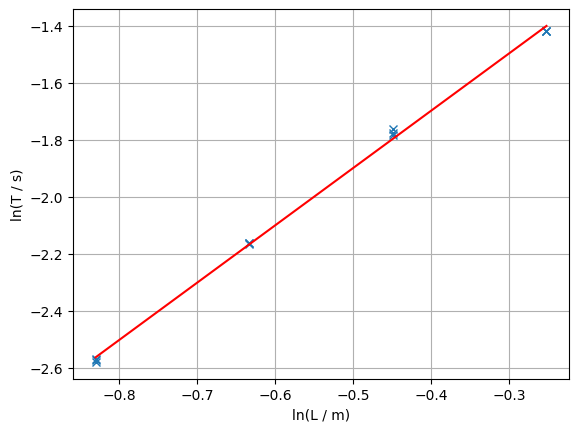

In [20]:
p = np.poly1d(z)
plt.plot(lL, lT, 'x')
plt.plot(lL, p(lL), 'r-')

plt.xlabel('ln(L / m)')
plt.ylabel('ln(T / s)')
plt.grid(True)
plt.show()

_Oscillation time as a function of length of free-swinging part of beam._

The slope of the linear regression was found to be $b = 2$. Thus, the exponent of $L$ in the formula is $b=2$.

### Variable 2 ($t$)

With the empirical value of $b=2$ in combination with the dimensional analysis, we can conclude that the exponent of $t$ in the formula is $d=-1$. Hence, the formula for $T$ is

$$T=\frac{k L^2}{t} \sqrt{\frac{\rho}{E}}$$

### Dimensionless constant $k$

The dimensionless constant was calculated by measuring the period $T$ for different beam configurations. We combined the previous $L$-dependent measurements (plugged into the deducted formula) with 18 new measurements where the material (and thus $E$ and $\rho$) and $t$ was varied. The additional measurements were performed in order to increase the precision of $k$. By plotting the data with $\frac{L^2}{t}\sqrt{\frac{\rho}{E}}$ on the x-axis and $T$ on the y-axis, the slope of the linear regression line gives the value of $k$.

In [21]:
def calc_x(density, length, elastic_modulus, thickness):
    return (length ** 2 / thickness) * np.sqrt(density / elastic_modulus)

def steel_x(length):
    return calc_x(7.8e3, length, 2e11, 3.25e-3)

def alu_x(length):
    return calc_x(2.7e3, length, 7e10, 5.4e-3)

x = [
    steel_x(0.590), steel_x(0.590), steel_x(0.590),
    steel_x(0.466), steel_x(0.466), steel_x(0.466),
    steel_x(0.680), steel_x(0.680), steel_x(0.680),
    alu_x(0.653), alu_x(0.653), alu_x(0.653),
    alu_x(0.542), alu_x(0.542), alu_x(0.542),
    alu_x(0.833), alu_x(0.833), alu_x(0.833),
] + [steel_x(l) for l in L] # reuse data from previous experiment
T1 = [
    0.1403, 0.1401, 0.1401,
    0.0898, 0.0897, 0.0898,
    0.1830, 0.1813, 0.1826,
    0.1087, 0.1097, 0.1085,
    0.0745, 0.0745, 0.0745,
    0.1715, 0.1725, 0.1715,
] + T

z = np.polyfit(x, T1, 1)
p = np.poly1d(z)

print("k = ", z[0])

k =  6.49439152139969


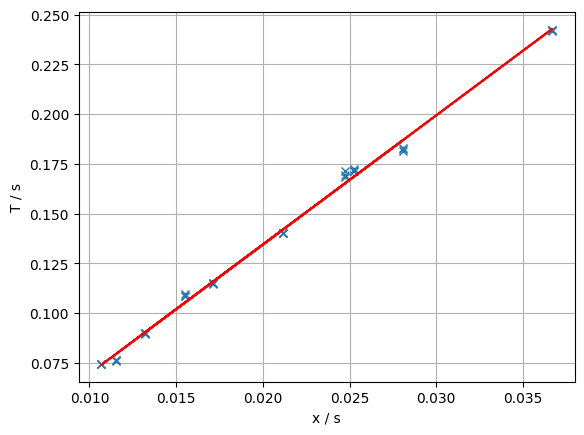

In [22]:
plt.plot(x, T1, 'x')
plt.plot(x, p(x), 'r-')

plt.xlabel('x / s')
plt.ylabel('T / s')
plt.grid(True)
plt.show()

_Oscillation time as a function of the product of all variables except the constant $k$._

The value of $k$ was found to be $k=6.49$.

### Conclusion

The formula for the period of the oscillation is

$$T=6.49 \frac{L^2}{t} \sqrt{\frac{\rho}{E}}.$$

The value of $k$ is _close enough_ to $2\pi$ (the correct value of $k$).